<a href="https://colab.research.google.com/github/snehagkadam/Internship-Task/blob/main/Prodigy(Task2%20EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
# Load the datasets
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
gender_submission_df = pd.read_csv("/content/gender_submission.csv")

# Display the first few rows of each dataset
train_df.head(), test_df.head(), gender_submission_df.head()


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [ ]:


# Save 'Survived' for later, only exists in train
train_target = train_df["Survived"]

# Combine train and test for uniform preprocessing
train_df["source"] = "train"
test_df["source"] = "test"
test_df["Survived"] = -1  # Placeholder

full_df = pd.concat([train_df, test_df], ignore_index=True)

# Drop Cabin (too many missing values), and Ticket (not useful for most models)
full_df.drop(["Cabin", "Ticket"], axis=1, inplace=True)

# Fill missing Embarked with mode
full_df["Embarked"].fillna(full_df["Embarked"].mode()[0], inplace=True)

# Fill missing Fare with median
full_df["Fare"].fillna(full_df["Fare"].median(), inplace=True)

# Fill missing Age with median
full_df["Age"].fillna(full_df["Age"].median(), inplace=True)

# Convert Sex to numeric (male = 0, female = 1)
full_df["Sex"] = full_df["Sex"].map({"male": 0, "female": 1})

# Convert Embarked to numeric
embarked_map = {'S': 0, 'C': 1, 'Q': 2}
full_df["Embarked"] = full_df["Embarked"].map(embarked_map)

# Drop Name (optional, or extract titles from it if needed)
full_df.drop(["Name"], axis=1, inplace=True)

# Restore train and test datasets
train_cleaned = full_df[full_df["source"] == "train"].drop(["source"], axis=1)
test_cleaned = full_df[full_df["source"] == "test"].drop(["Survived", "source"], axis=1)

# Separate the target again
y_train = train_cleaned["Survived"]
X_train = train_cleaned.drop(["Survived"], axis=1)



<ipython-input-7-7bd960333f9d>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df["Embarked"].fillna(full_df["Embarked"].mode()[0], inplace=True)
<ipython-input-7-7bd960333f9d>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

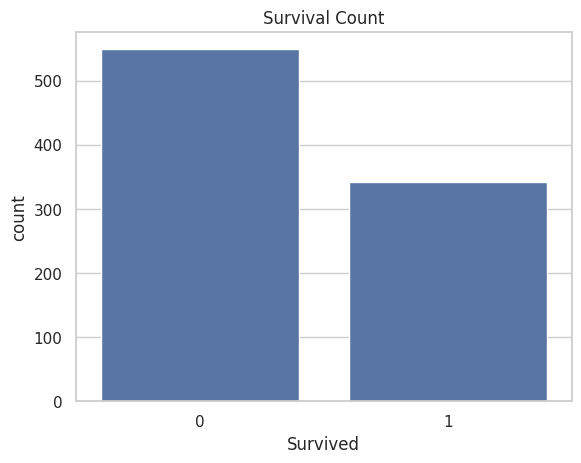

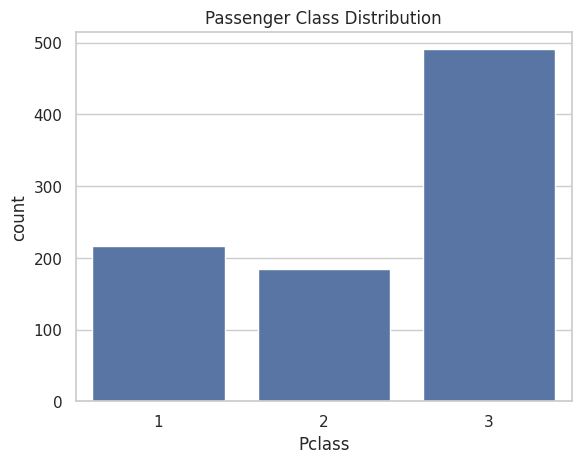

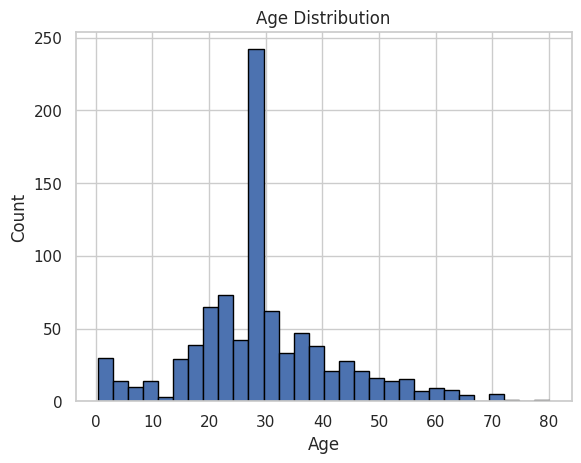

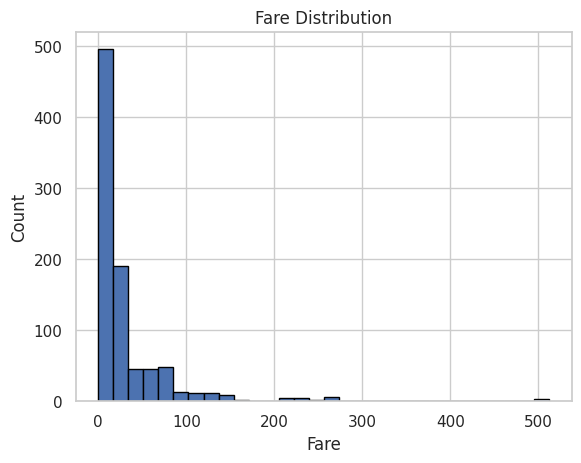

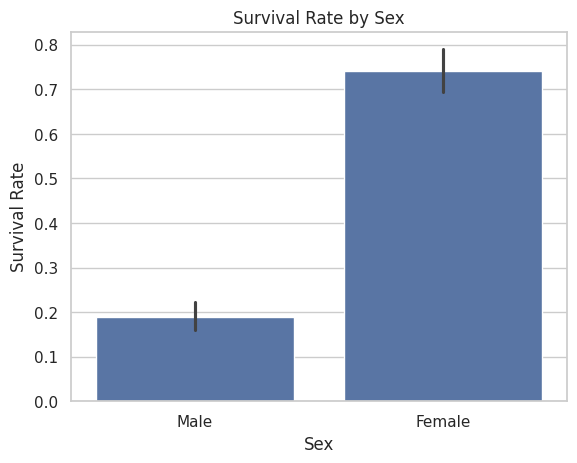

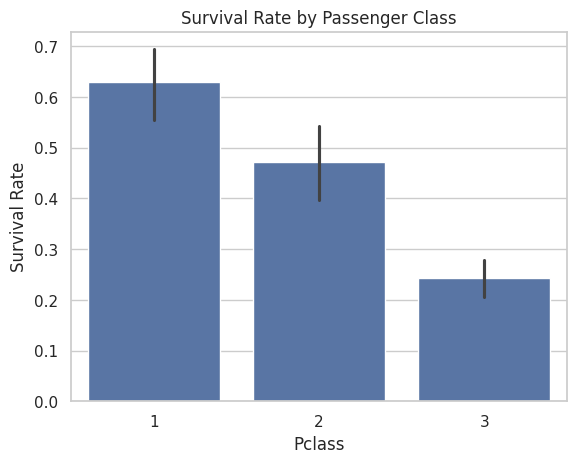

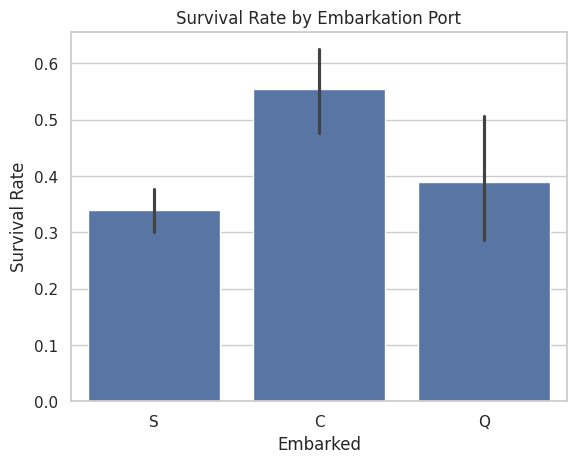

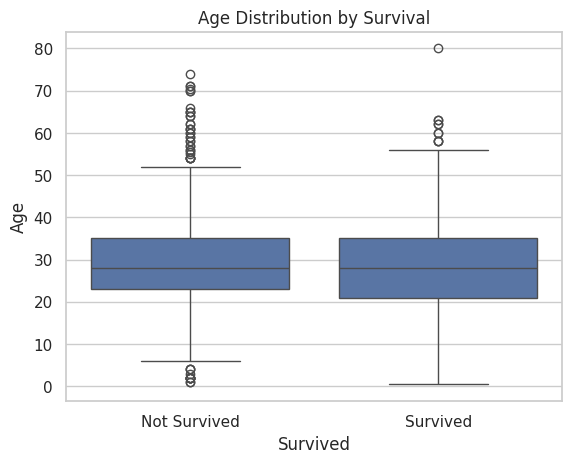

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Combine X_train and y_train for analysis
eda_df = X_train.copy()
eda_df["Survived"] = y_train

# -------------------------
# Univariate Analysis
# -------------------------

# Plot survival count
sns.countplot(data=eda_df, x="Survived")
plt.title("Survival Count")
plt.show()

# Plot Pclass distribution
sns.countplot(data=eda_df, x="Pclass")
plt.title("Passenger Class Distribution")
plt.show()

# Plot Age distribution
plt.hist(eda_df["Age"], bins=30, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Plot Fare distribution
plt.hist(eda_df["Fare"], bins=30, edgecolor="black")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# -------------------------
# Bivariate Analysis
# -------------------------

# Survival by Sex
sns.barplot(data=eda_df, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.xticks([0, 1], ["Male", "Female"])
plt.ylabel("Survival Rate")
plt.show()

# Survival by Pclass
sns.barplot(data=eda_df, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Survival by Embarked
sns.barplot(data=eda_df, x="Embarked", y="Survived")
plt.title("Survival Rate by Embarkation Port")
plt.xticks([0, 1, 2], ["S", "C", "Q"])
plt.ylabel("Survival Rate")
plt.show()

# Age vs Survival (boxplot)
sns.boxplot(data=eda_df, x="Survived", y="Age")
plt.title("Age Distribution by Survival")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()
